2023-11-24 07:46:48.244551: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-24 07:46:49.335038: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-11-24 07:46:50.624938: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-24 07:46:50.984678: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GP

4/4 [==============================] - 2s 161ms/step
Min: [1988.661]
Max: [1993.602]


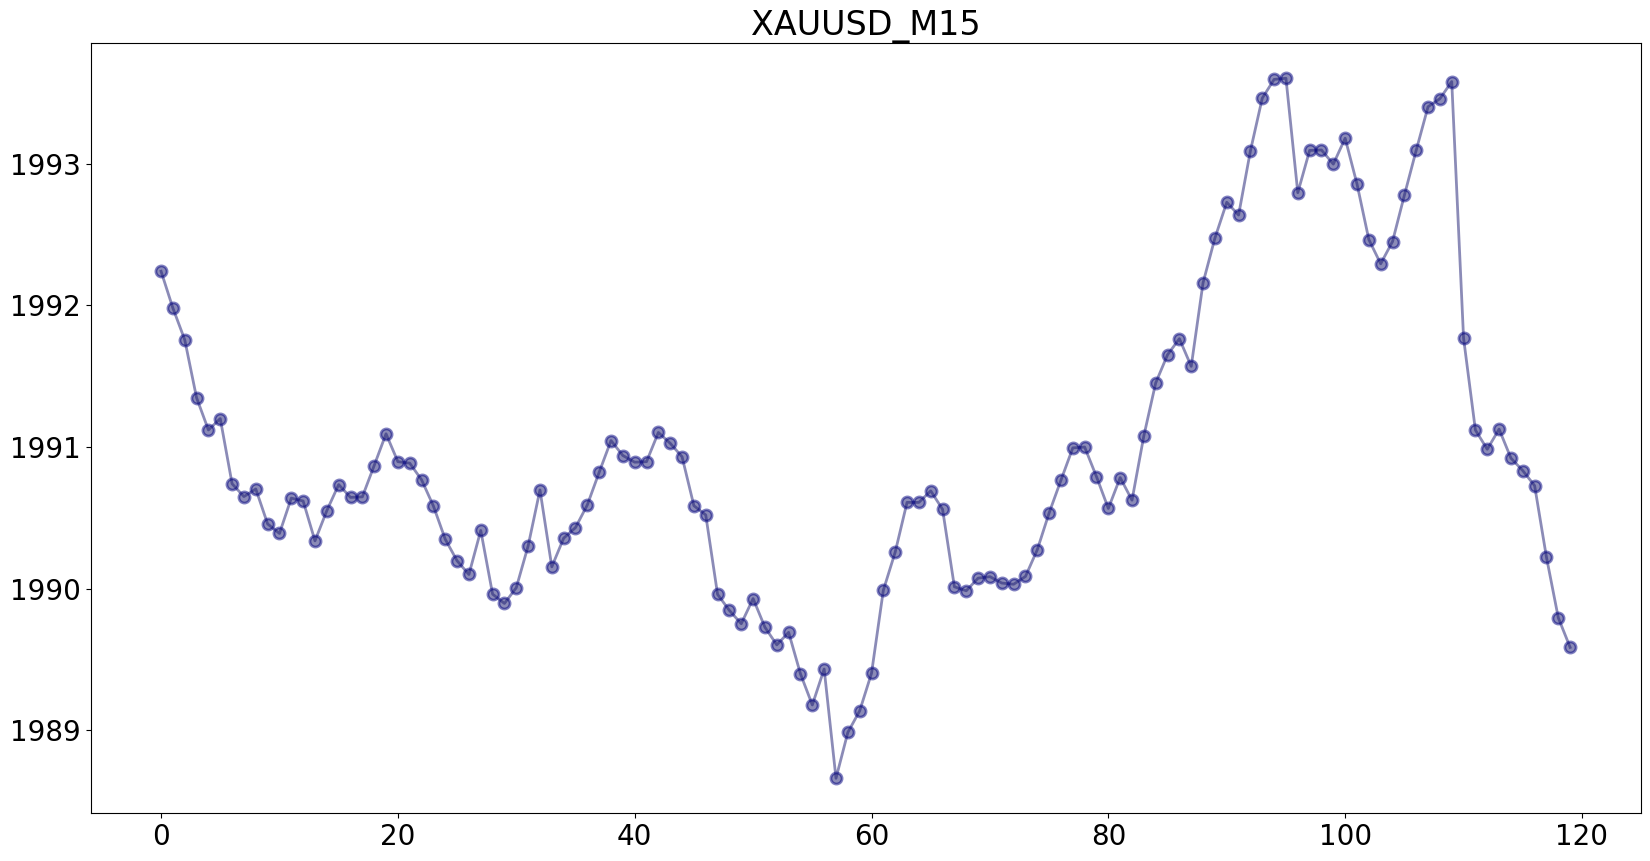

In [1]:
import pandas as pd
import prepareData
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

class Predict :

    def __init__(self) -> None:
        self.model = tf.keras.models.load_model('forex')

    def execute(self):
        
        self.X_test = []
        self.dataToPredict = []
        self.label = "XAUUSD_M15"
        self.preparedData = prepareData.PrepareData(self.label + '.csv')
        trainLen = 120
        self.preparedData.execute(trainLen)

        inputs = self.preparedData.new_data[len(self.preparedData.new_data) - len(self.preparedData.valid) - trainLen:].values
        inputs = inputs.reshape(-1,1)
        inputs  = self.preparedData.scaler.transform(inputs)

        for i in range(trainLen,inputs.shape[0]):
            self.X_test.append(inputs[i-trainLen:i,0])

        self.dataToPredict = self.preparedData.scaler.inverse_transform(self.X_test)
        self.X_test = np.array(self.X_test)
        self.X_test = np.reshape(self.X_test, (self.X_test.shape[0],self.X_test.shape[1],1))

        result = self.preparedData.scaler.inverse_transform(self.model.predict(self.X_test))

        self.reversed_result = result[::-1]



predict = Predict()
result = predict.execute()
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20,10))
plt.title(predict.label)
print("==================================================")
print("Min: " + str(min(predict.reversed_result)))
print("Max: " + str(max(predict.reversed_result)))
print("==================================================")

plt.plot(predict.reversed_result, label = 'Previsão', marker='o', c='midnightblue', ls='-', lw=2, ms=8, mew=2, mec='navy', alpha=.5)
